# Additional Simulation

## Medium zones without guardrails

To analyze the effects of guardrails, we are going to simulate the performance of individual students in the school assignment process for each equity tiebreaker under the assumption that there are no guardrails.

These plots should be contrasted with those in the original simulation section, and we have not fully incorporated the analysisi in our findings. We hope to continue working on how the tiebreaker can be incorporated into the rest of the assignment process.

To be consistent with the previous simulation, for this analysis, we are considering as __focal__ students those individuals who both are African-American, Latinx, or Pacific Islander (AALPI) and are eligible for free or reduced lunch (FRL).

In particular, we are focusing on three tiebreakers or methodologies: 
- the implemented CTIP1 classifier at an FPR of 10%,
- the Naive Classifier at 11% FPR (`naive016`), hereafter referred to as the __Benchmark__ methodology,
- and a Propositional Classifier at 10% FPR (`pc3_035`), hereafter referred to as the __DSSG Equity Tiebreaker (ET)__.

The propositional classifier `pc3_035` considers redline and subsidized housing zones as eligibility criteria and the individual block requirement of more than 35% focal students. As a reminder, this analysis considers the students who are both AALPI and FRL as focal students:

```
eligibility_classifier = orClassifier(["Housing", "Redline"], binary_var=[0,1])
propositional_model = andClassifier(["pctBoth"], positive_group=positive_group, eligibility_classifier=eligibility_classifier, frl_key=frl_key)
```

In [1]:
import sys
from collections import OrderedDict
from IPython.core.display import display, HTML
sys.path.append('../')
from src.d06_reporting.simulation_evaluation import SimulationEvaluation

In [2]:
# SimulationEvaluation.get_available_models()

In [3]:
# Definition of focal student to be applied to the student data
def is_focal(row):
    return int(row['FRL'] & row['AALPI'])
# Simulation configuration
policy = 'Medium1'
guard_rails = -1
utility_model = True
num_iterations=20

# Methods to evaluate
method_name_dict = OrderedDict(none='No ET', ctip1='CTIP1', pc3_035='DSSG ET', naive016='Benchmark')

se = SimulationEvaluation(method_name_dict=method_name_dict, is_focal=is_focal)
se.set_simulation_config(equity_tiebreaker_list=list(method_name_dict.keys()),
                         num_iterations=num_iterations,
                         policy=policy,
                         guard_rails=guard_rails,
                         utility_model=utility_model)
# Load the rank data
se.query_rank_df()

,Designation Rate
method,
Benchmark,0.21
CTIP1,0.22
DSSG ET,0.21
No ET,0.21


status,Extended Positive,False Negative,False Positive,True Negative,True Positive,FPR,TPR
method,,,,,,,
Benchmark,5000.0,10660.0,3520.0,66260.0,10000.0,0.11,0.48
CTIP1,3880.0,13560.0,3300.0,67600.0,7100.0,0.10,0.34
DSSG ET,4060.0,12460.0,3580.0,67140.0,8200.0,0.10,0.40
No ET,0.0,20660.0,0.0,74780.0,0.0,0.00,0.00


As a sanity check we can quickly compute the designation rate of each simulated methodology

# Quantifing the effects of the tiebreakers


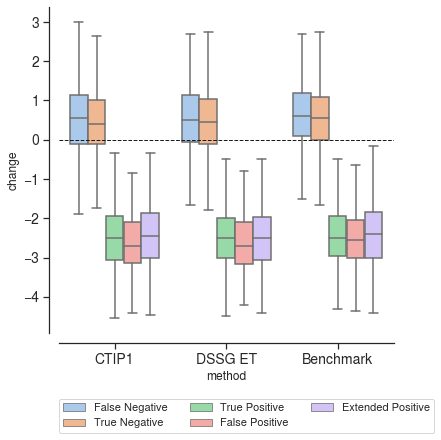

change                                  
                              mean   std   sem lower_95ci upper_95ci
method    status                                                    
Benchmark Extended Positive  -2.39  0.82  0.05      -2.49      -2.28
          False Negative      0.66  0.85  0.04       0.58       0.73
          False Positive     -2.55  0.73  0.05      -2.66      -2.44
          True Negative       0.56  0.84  0.01       0.53       0.59
          True Positive      -2.44  0.78  0.04      -2.51      -2.37
CTIP1     Extended Positive  -2.40  0.87  0.06      -2.52      -2.28
          False Negative      0.51  0.89  0.03       0.45       0.58
          False Positive     -2.59  0.77  0.06      -2.71      -2.47
          True Negative       0.44  0.84  0.01       0.42       0.47
          True Positive      -2.46  0.83  0.04      -2.54      -2.37
DSSG ET   Extended Positive  -2.49  0.83  0.06      -2.60      -2.38
          False Negative      0.56  0.86  0.03       0.49       0.62
          False Positive     -2.62  0.75  0.06      -2.73      -2.51
          True Negative       0.48  0.85  0.01       0.45       0.51
          True Positive      -2.47  0.75  0.04      -2.54      -2.40

In [4]:
display(HTML("<h3>Figure 2: Average change in rank of assigned program grouped by classification status</h3>"))
se.plot_improvement_over_none(hue='status')

From Figure 2 we notice, comparing the values to the guardrails simulations, that True Positives see an improvement of a whole index (on average) in their preference ranks when the guardrails are removed.

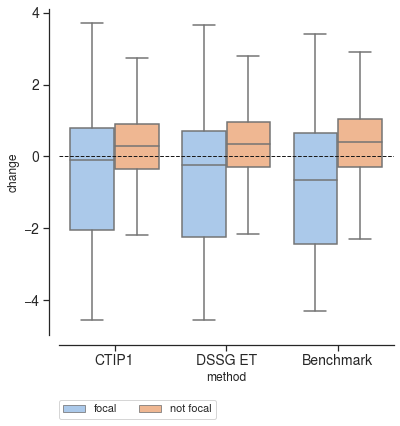

change                                  
                      mean   std   sem lower_95ci upper_95ci
method    focal                                             
Benchmark focal      -0.84  1.75  0.05      -0.95      -0.74
          not focal   0.22  1.27  0.02       0.18       0.26
CTIP1     focal      -0.51  1.66  0.05      -0.61      -0.41
          not focal   0.16  1.20  0.02       0.12       0.20
DSSG ET   focal      -0.64  1.69  0.05      -0.75      -0.54
          not focal   0.17  1.25  0.02       0.13       0.21

In [5]:
display(HTML("<h3>Figure 3: Average change in rank of assigned program grouped by student type</h3>"))
se.plot_improvement_over_none(hue='focal')

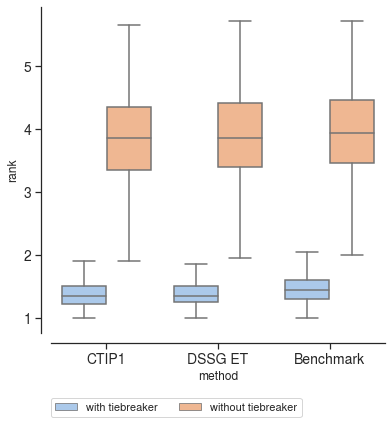

In [6]:
display(HTML("<h3>Figure 4: Distribution of average rank of assigned program for True Positives with and without tiebreakr</h3>"))
se.plot_improvement_tp()

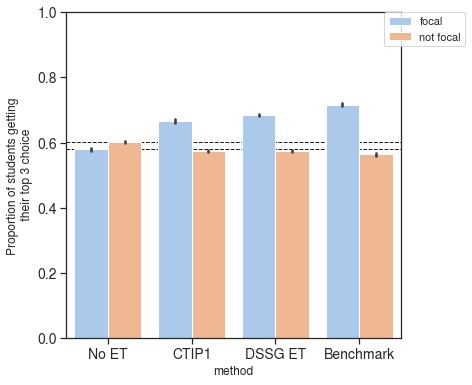

rank                                 
                     mean   std  sem lower_95ci upper_95ci
method    focal                                           
Benchmark focal      0.72  0.01  0.0       0.71       0.72
          not focal  0.56  0.01  0.0       0.56       0.57
CTIP1     focal      0.67  0.01  0.0       0.66       0.67
          not focal  0.58  0.01  0.0       0.57       0.58
DSSG ET   focal      0.68  0.01  0.0       0.68       0.69
          not focal  0.57  0.01  0.0       0.57       0.58
No ET     focal      0.58  0.01  0.0       0.57       0.58
          not focal  0.60  0.01  0.0       0.60       0.61

In [7]:
display(HTML("<h3>Figure 5: Proportion of students getting one of their top 3 choice</h3>"))
se.topkrank()

We can remarkably see how the proportion of students getting into their top choices increase on almost 7%